In [379]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

## Data inputs

In [380]:
# Read csv data
accident = pd.read_csv('dft-accident.csv')
london_la = pd.read_csv('Local_Authority_District_to_County_(December_2015)_Lookup_in_England.csv')
label_lookup = pd.read_csv('Road-Safety-Open-Dataset-Data-Guide.csv')

/opt/conda/envs/sds2021/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning:

Columns (0,2,35) have mixed types.Specify dtype option on import or set low_memory=False.



In [381]:
# filter for LAD15CD codes for London
london_la = london_la[london_la['CTY15NM'].str.contains('London')]
london_la.head()

,LAD15CD,LAD15CDO,LAD15NM,CTY15CD,CTY15CDO,CTY15NM,FID
0,E09000001,00AA,City of London,E13000001,0,Inner London,1
2,E09000002,00AB,Barking and Dagenham,E13000002,0,Outer London,3
5,E09000003,00AC,Barnet,E13000002,0,Outer London,6
6,E09000004,00AD,Bexley,E13000002,0,Outer London,7
9,E09000005,00AE,Brent,E13000002,0,Outer London,10


In [382]:
accident_london = accident[accident['local_authority_ons_district'].isin(london_la['LAD15CD'])]
accident_london

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2019010128300,2019,10128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,...,5,1,1,1,0,0,1,3,2,E01004762
1,2019010152270,2019,10152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,...,9,4,1,1,0,0,1,3,2,E01003117
2,2019010155191,2019,10155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000943
3,2019010155192,2019,10155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,...,0,4,1,1,0,0,1,1,2,E01000973
4,2019010155194,2019,10155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97737,2019480951145,2019,480951145,532815.0,181184.0,-0.087348,51.513978,48,3,1,...,0,4,1,1,0,0,1,2,2,E01032739
97738,2019480951151,2019,480951151,533246.0,181528.0,-0.081010,51.516968,48,3,1,...,5,1,1,1,0,0,1,2,2,E01032739
97739,2019480951155,2019,480951155,531454.0,180831.0,-0.107082,51.511124,48,3,2,...,0,4,1,1,0,0,1,2,2,E01032740
97740,2019480951177,2019,480951177,532251.0,181025.0,-0.095531,51.512682,48,3,2,...,5,1,2,2,0,0,1,1,2,E01032739


In [383]:
accident_london.to_csv('london_accidents.csv')

In [384]:
list(accident_london.columns.values)

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [385]:
accident_london.dtypes

accident_index                                  object
accident_year                                    int64
accident_reference                              object
location_easting_osgr                          float64
location_northing_osgr                         float64
longitude                                      float64
latitude                                       float64
police_force                                     int64
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
date                                            object
day_of_week                                      int64
time                                            object
local_authority_district                         int64
local_authority_ons_district                    object
local_authority_highway                         object
first_road_class                                 int64
first_road

In [386]:
date = accident_london['date'].str.split('/', expand=True)
accident_london['day'] = date[0]
accident_london['month'] = date[1]

time = accident_london['time'].str.split(':', expand=True)
accident_london['hour'] = time[0]
accident_london['minute'] = time[1]

accident_london

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,hour,minute
0,2019010128300,2019,10128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,...,0,0,1,3,2,E01004762,18,02,17,50
1,2019010152270,2019,10152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,...,0,0,1,3,2,E01003117,15,01,21,45
2,2019010155191,2019,10155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,...,0,0,1,1,2,E01000943,01,01,01,50
3,2019010155192,2019,10155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,...,0,0,1,1,2,E01000973,01,01,01,20
4,2019010155194,2019,10155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,...,0,0,1,1,2,E01000546,01,01,00,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97737,2019480951145,2019,480951145,532815.0,181184.0,-0.087348,51.513978,48,3,1,...,0,0,1,2,2,E01032739,17,10,22,15
97738,2019480951151,2019,480951151,533246.0,181528.0,-0.081010,51.516968,48,3,1,...,0,0,1,2,2,E01032739,24,10,18,10
97739,2019480951155,2019,480951155,531454.0,180831.0,-0.107082,51.511124,48,3,2,...,0,0,1,2,2,E01032740,06,12,18,30
97740,2019480951177,2019,480951177,532251.0,181025.0,-0.095531,51.512682,48,3,2,...,0,0,1,1,2,E01032739,12,12,15,23


In [387]:
weekday = [1,2,3,4,5]
weekend = [6,7]

weekday_accidents = accident_london[accident_london['day_of_week'].isin(weekday)]
weekday_accidents = weekday_accidents.sort_values('hour', ascending=True)

weekend_accidents = accident_london[accident_london['day_of_week'].isin(weekend)]
weekend_accidents = weekend_accidents.sort_values('hour', ascending=True)

[Text(0.5, 0, 'Hour'),
 Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Weekend Accidents')]

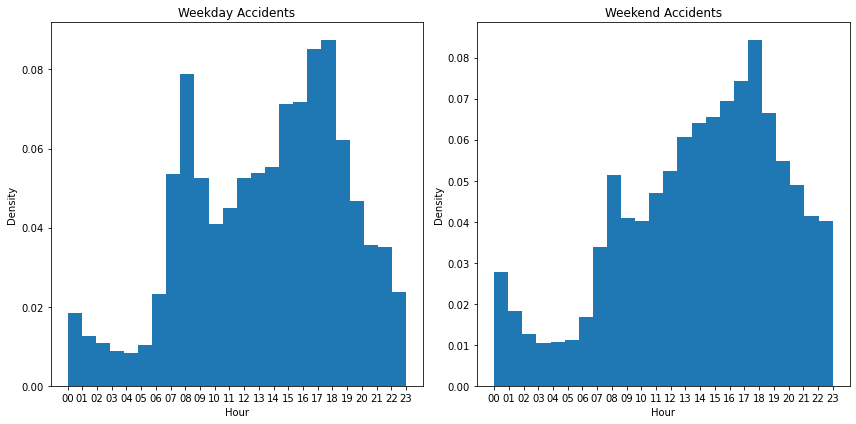

In [388]:
fig, axs = plt.subplots(1, 2, figsize=(12,6), tight_layout=True)

axs[0].hist(weekday_accidents['hour'], bins=24, density=True)
axs[1].hist(weekend_accidents['hour'], bins=24, density=True)
axs[0].set(xlabel="Hour", ylabel="Density", title="Weekday Accidents")
axs[1].set(xlabel="Hour", ylabel="Density", title="Weekend Accidents")

In [389]:
accident_london['date'] = pd.to_datetime(accident_london['date'])
accident_london

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,hour,minute
0,2019010128300,2019,10128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,...,0,0,1,3,2,E01004762,18,02,17,50
1,2019010152270,2019,10152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,...,0,0,1,3,2,E01003117,15,01,21,45
2,2019010155191,2019,10155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,...,0,0,1,1,2,E01000943,01,01,01,50
3,2019010155192,2019,10155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,...,0,0,1,1,2,E01000973,01,01,01,20
4,2019010155194,2019,10155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,...,0,0,1,1,2,E01000546,01,01,00,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97737,2019480951145,2019,480951145,532815.0,181184.0,-0.087348,51.513978,48,3,1,...,0,0,1,2,2,E01032739,17,10,22,15
97738,2019480951151,2019,480951151,533246.0,181528.0,-0.081010,51.516968,48,3,1,...,0,0,1,2,2,E01032739,24,10,18,10
97739,2019480951155,2019,480951155,531454.0,180831.0,-0.107082,51.511124,48,3,2,...,0,0,1,2,2,E01032740,06,12,18,30
97740,2019480951177,2019,480951177,532251.0,181025.0,-0.095531,51.512682,48,3,2,...,0,0,1,1,2,E01032739,12,12,15,23


In [390]:
daily_count = accident_london.groupby('date').size()
daily_count = daily_count.to_frame()
daily_count.reset_index(inplace=True)
daily_count['moving_average'] = daily_count[0].rolling(7).mean()
daily_count

,date,0,moving_average
0,2019-01-01,49,NaN
1,2019-01-02,77,NaN
2,2019-01-03,56,NaN
3,2019-01-04,84,NaN
4,2019-01-05,73,NaN
...,...,...,...
360,2019-12-27,37,44.857143
361,2019-12-28,42,41.857143
362,2019-12-29,45,41.857143
363,2019-12-30,43,38.285714


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Count of Accidents'),
 Text(0.5, 1.0, 'Temporal analysis of accident counts')]

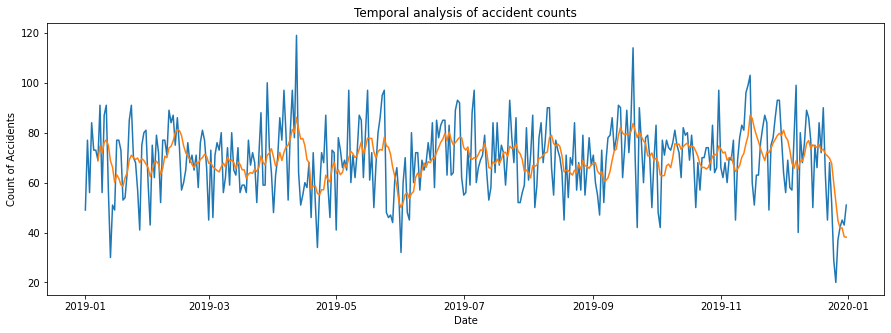

In [391]:
fig, axes = plt.subplots(1, 1, figsize=(15,5) )
#plt.figure(figsize=(15,5))
#axes.xaxis.set_major_locator(MaxNLocator(nbins=12, min_n_ticks=12))
axes.plot(daily_count['date'], daily_count[0])
axes.plot(daily_count['date'], daily_count['moving_average'])
axes.set(xlabel="Date", ylabel="Count of Accidents", title="Temporal analysis of accident counts")

In [392]:
weather  = label_lookup[label_lookup['field name'].str.contains('weather_conditions')]
weather

,table,field name,code/format,label,note
1185,Accident,weather_conditions,1,Fine no high winds,NaN
1186,Accident,weather_conditions,2,Raining no high winds,NaN
1187,Accident,weather_conditions,3,Snowing no high winds,NaN
1188,Accident,weather_conditions,4,Fine + high winds,NaN
1189,Accident,weather_conditions,5,Raining + high winds,NaN
1190,Accident,weather_conditions,6,Snowing + high winds,NaN
1191,Accident,weather_conditions,7,Fog or mist,NaN
1192,Accident,weather_conditions,8,Other,NaN
1193,Accident,weather_conditions,9,Unknown,NaN
1194,Accident,weather_conditions,-1,Data missing or out of range,NaN


In [393]:
accident_london.loc[accident_london['weather_conditions']==1,'weather_conditions'] = "Low precipitation day"
accident_london.loc[accident_london['weather_conditions']==2,'weather_conditions'] = "High precipitation day"
accident_london.loc[accident_london['weather_conditions']==3,'weather_conditions'] = "High precipitation day"
accident_london.loc[accident_london['weather_conditions']==4,'weather_conditions'] = "Low precipitation day"
accident_london.loc[accident_london['weather_conditions']==5,'weather_conditions'] = "High precipitation day"
accident_london.loc[accident_london['weather_conditions']==6,'weather_conditions'] = "High precipitation day"
accident_london.loc[accident_london['weather_conditions']==7,'weather_conditions'] = "High precipitation day"
accident_london.loc[accident_london['weather_conditions']==8,'weather_conditions'] = "Other"
accident_london.loc[accident_london['weather_conditions']==9,'weather_conditions'] = "Other"
accident_london.loc[accident_london['weather_conditions']==-1,'weather_conditions'] = "Other"

daily_count_weather = accident_london.groupby(["date","weather_conditions"]).size()
daily_count_weather = daily_count_weather.to_frame()
daily_count_weather.reset_index(inplace=True)

daily_count_weather

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,weather_conditions,0
0,2019-01-01,Low precipitation day,47
1,2019-01-01,Other,2
2,2019-01-02,High precipitation day,71
3,2019-01-02,Low precipitation day,2
4,2019-01-02,Other,4
...,...,...,...
974,2019-12-30,Low precipitation day,38
975,2019-12-30,Other,4
976,2019-12-31,High precipitation day,8
977,2019-12-31,Low precipitation day,34


In [394]:
daily_count_weather.weather_conditions.unique()

array(['Low precipitation day', 'Other', 'High precipitation day'],
      dtype=object)

[Text(0.5, 0, 'Number of accidents'),
 Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Impact of Weather Conditions')]

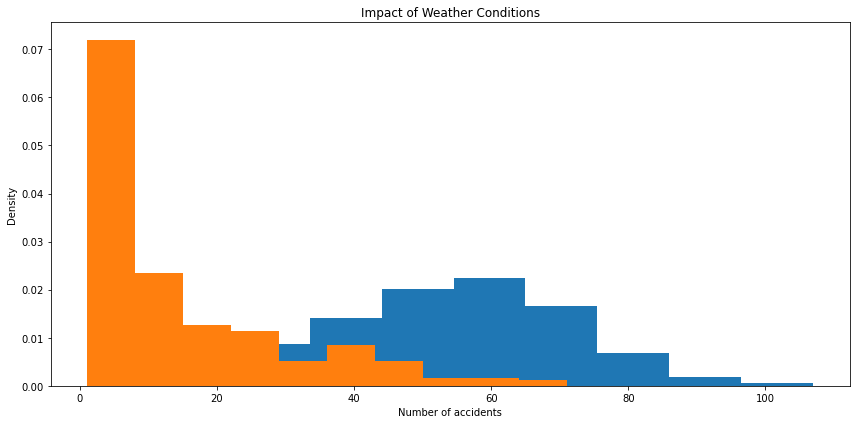

In [397]:
fig, axs = plt.subplots(1, 1, figsize=(12,6), tight_layout=True)

low_precip = daily_count_weather[daily_count_weather['weather_conditions'].str.contains('Low', regex=False)]
high_precip = daily_count_weather[daily_count_weather['weather_conditions'].str.contains('High', regex=False)]
other_precip = daily_count_weather[daily_count_weather['weather_conditions'].str.contains('Other', regex=False)]

axs.hist(low_precip[0], density=True, bins=10)
axs.hist(high_precip[0], density=True, bins=10)
#axs.hist(other_precip[0], bins=10)

axs.set(xlabel="Number of accidents", ylabel="Density", title="Impact of Weather Conditions")


In [317]:
label_lookup

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,location_easting_osgr,NaN,NaN,Null if not known
4,Accident,location_northing_osgr,NaN,NaN,Null if not known
...,...,...,...,...,...
1574,Casualty,casualty_imd_decile,-1,Data missing or out of range,field introduced in 2016
1575,Casualty,casualty_home_area_type,1,Urban area,field introduced in 1999
1576,Casualty,casualty_home_area_type,2,Small town,field introduced in 1999
1577,Casualty,casualty_home_area_type,3,Rural,field introduced in 1999


In [318]:
traffic = pd.read_csv('tra0305.csv')
traffic = traffic.transpose()
traffic = traffic.iloc[:,12:]
traffic.drop(columns=[13], axis=1, inplace=True)
traffic

,12
Month,Year
0,109.1
1,64.2
2,46.0
3,47.4
4,80.1
5,258.2
6,613.0
7,1141.4
8,1341.6
